## Generating Animated Plots with Pandas_Alive

In this tutorial we'll learn how to create a series of animations using Pandas_Alive. This post is rendered in the style of a Jupyter Notebook. Find the source here: [INSERT BASE LINK]

![SHOW FINAL ANIMATION]

### pandas_alive python package

[pandas_alive](https://github.com/JackMcKew/pandas_alive) is a python package that automates the process of making these animations. Head over to the [github repository](https://github.com/JackMcKew/pandas_alive) to see even more examples!

#### Installation

Install with `pip install pandas_alive`

### Supported Chart Types

See the README on GitHub for current chart types at <https://github.com/JackMcKew/pandas_alive#currently-supported-chart-types>

At the time of writing the currently supported chart types are:

- Horizontal Bar Chart Races
- Vertical Bar Chart Races
- Line Charts
- Scatter Charts
- Pie Charts

### Requirements

`pandas_alive` utilises the [matplotlib.animation function](https://matplotlib.org/3.2.1/api/animation_api.html), thus requiring a writer library.

Ensure to have one of the supported tooling software installed prior to use!

- [ffmpeg](https://ffmpeg.org/)
- [ImageMagick](https://imagemagick.org/index.php)
- [Pillow](https://pillow.readthedocs.io/en/stable/)
- See more at <https://matplotlib.org/3.2.1/api/animation_api.html#writer-classes>


## Bar Chart Race

Firstly let's build a bar chart race of the population change by year in all the countries of the world.

Once pandas_alive is installed with `pip install pandas_alive`, we import the package, along with `pandas`.

In [1]:
import pandas_alive
import pandas as pd

Next we need to import the data!

We do the following steps:

1. Using `pandas`, we can read the data into a DataFrame using `pd.read_csv`, ensuring to use the keyword `parse_dates` on the Year column in our dataset.

2. Next we rename the columns to make life easier.

3. We're only interested in years 1800 onwards, so we can make a selection and drop the data that isn't on or after the year 1800.

4. Finally we convert the 'Year' column into datetime format, read more about datetime format here: <https://docs.python.org/3/library/datetime.html>

In [2]:
# Data Source: https://ourworldindata.org/grapher/population-by-country
df = pd.read_csv('population-by-country.csv',parse_dates=['Year'])

# Rename columns
column_names = ['Country','Country Code','Year','Population']
df.columns = column_names

# Only years from 1800 onwards
df = df[df['Year'].astype(int) >= 1800]

# Convert Year column to datetime
df['Year'] = pd.to_datetime(df['Year'])

display(df)

,Country,Country Code,Year,Population
3,Afghanistan,AFG,1800-01-01,3280000.0
4,Afghanistan,AFG,1820-01-01,3280000.0
5,Afghanistan,AFG,1850-01-01,3750000.0
6,Afghanistan,AFG,1870-01-01,4207000.0
7,Afghanistan,AFG,1900-01-01,5000000.0
...,...,...,...,...
3216,Zimbabwe,ZWE,1960-01-01,3751000.0
3217,Zimbabwe,ZWE,1970-01-01,5514536.0
3218,Zimbabwe,ZWE,1980-01-01,7169968.0
3219,Zimbabwe,ZWE,1990-01-01,10156000.0


As we can see, our data is currently in a 'long' format; where each row is one time point per subject. Meaning each row (country) will have data in multiple rows. 

`pandas_alive` requires the data to be in a 'wide' format, where:

- Each row represents a single point/period in time
- Each column holds the value for a particular category (country in this case)
- The index contains the time component (optional, if not used ensure to use `interpolate_period=False`)

To convert our data from 'long' to 'wide' format, we can use the `pandas` function `pivot` to achieve this!

> For any missing data we fill this with 0 using `.fillna(0)`

In [3]:
# Pivot data to turn from `long` to `wide` format
pivoted_df = df.pivot(index='Year',columns='Country',values='Population').fillna(0)

display(pivoted_df.head(5))

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1800-01-01,3280000.0,400000.0,2500000.0,2654.0,1567028.0,37000.0,534000.0,413326.0,200000.0,3000000.0,...,10750000.0,6000000.0,55000.0,1919159.0,27791.0,1000000.0,4000000.0,2593000.0,747000.0,1085814.0
1810-01-01,0.0,0.0,0.0,0.0,0.0,0.0,406000.0,0.0,0.0,0.0,...,11970000.0,7240000.0,0.0,0.0,0.0,802000.0,0.0,0.0,0.0,0.0
1820-01-01,3280000.0,437000.0,2689000.0,2654.0,1567028.0,0.0,534000.0,413326.0,334000.0,3369000.0,...,21239000.0,9980510.2,55000.0,1919159.0,27791.0,718000.0,6551000.0,2593000.0,0.0,1085814.0
1830-01-01,0.0,0.0,0.0,0.0,0.0,0.0,634000.0,0.0,330000.0,3538000.0,...,24139000.0,13240313.9,0.0,0.0,0.0,887000.0,0.0,0.0,0.0,0.0
1840-01-01,0.0,0.0,0.0,0.0,0.0,0.0,768000.0,0.0,420000.0,3716000.0,...,26745000.0,17443768.0,0.0,0.0,0.0,1219000.0,0.0,0.0,0.0,0.0


Now that our data is prepared in 'wide' format, we're ready to create the animation!

Ensuring that `pandas_alive` has been imported, we can now call `.plot_animated()` on our DataFrame. If a `filename` is passed, along with an extension (eg, .mp4, .gif), `pandas_alive` will export the animation to a file. Otherwise, `pandas_alive` creates an instance of the animation for use in `pandas_alive.animate_multiple_plots()`.

We can configure settings of `.plot_animated`, such as:
- `n_visible` - Change the number of visible bars on the plot
- `period_fmt` - Change the way the date is represented on the plot (eg, '%d/%m/%Y')
- `title` - Set a title for the plot
- `fixed_max` - Set the x-axis to be fixed from the lowest - biggest number
- `perpendicular_bar_func` - Set the function to show a perpendicular bar (eg 'mean', 'min','max', custom function, etc)

There are many more settings which you can read more over at the documentation:  <https://jackmckew.github.io/pandas_alive/generated/pandas_alive.plotting.plot.html#pandas_alive.plotting.plot>

In [4]:
# Generate bar chart race
bar_chart_race = pivoted_df.plot_animated(filename='population-over-time-bar-chart-race.gif',n_visible=10,period_fmt="%Y",title='Top 10 Populous Countries 1800-2000',fixed_max=True,perpendicular_bar_func='mean')

Generating BarChartRace, plotting ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Iran', 'Iraq', 'Irela

![Population Bar Chart Race](population-over-time-bar-chart-race.gif)

What if we wanted to show a custom function for each time period. This can be achieved with defining a function and returns a dictionary on where the label should be located. Let's show the total population for each time period in the bottom left.

In [5]:
def current_total(values):
    total = values.sum()
    s = f'Total Population : {int(total):,}'
    return {'x': .85, 'y': .2, 's': s, 'ha': 'right', 'size': 11}

# Generate bar chart race
bar_chart_race = pivoted_df.plot_animated(filename='population-over-time-bar-chart-race-with-total.gif',n_visible=10,period_fmt="%Y",title='Top 10 Populous Countries 1800-2000',period_summary_func=current_total)

Generating BarChartRace, plotting ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Iran', 'Iraq', 'Irela

![Population Bar Chart Race With Total](population-over-time-bar-chart-race-with-total.gif)

## Line Charts

Let's show the total population over time.

Get the total population for each year by summing the entire row `.sum(axis=1)`

In [6]:
total_df = pivoted_df.sum(axis=1)

display(total_df)

Year
1800-01-01    6.706962e+08
1810-01-01    3.742780e+08
1820-01-01    1.013967e+09
1830-01-01    8.385709e+08
1840-01-01    8.768713e+08
1850-01-01    1.095515e+09
1860-01-01    1.005687e+09
1870-01-01    1.201439e+09
1880-01-01    1.096303e+09
1890-01-01    1.266791e+09
1900-01-01    1.382444e+09
1910-01-01    1.593107e+09
1920-01-01    1.619245e+09
1930-01-01    1.804095e+09
1940-01-01    1.994912e+09
1950-01-01    2.417460e+09
1960-01-01    2.911371e+09
1970-01-01    3.536889e+09
1980-01-01    4.245110e+09
1990-01-01    5.030435e+09
2000-01-01    5.800368e+09
dtype: float64

Now let's create an animated line chart with this data using `pandas_alive`.

In [7]:
animated_line_chart = total_df.plot_animated(kind='line',filename="total-population-over-time-line.gif",period_fmt="%Y",title="Total Population Over Time")

Generating LineChart, plotting ['0']


![Population Line Chart](total-population-over-time-line.gif)

## Combining Both Charts

Now that we've created a bar chart race & a line chart, let's combine the two charts into a single animation!

Luckily, `pandas_alive` makes this simple, as we can pass a list of animations we'd like to combine into `pandas_alive.animate_multiple_plots`.

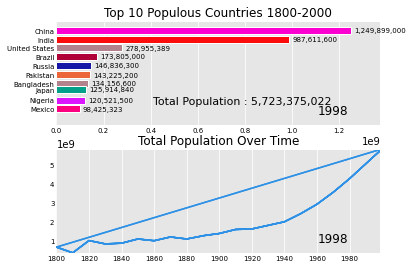

In [8]:
pandas_alive.animate_multiple_plots('population-combined-charts.gif',[bar_chart_race,animated_line_chart])

![Combined Charts](population-combined-charts.gif)